# Policy Iteration on Grid World

In [2]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import numpy as np
from gridworld import GridWorld, plot_value,plot_policy

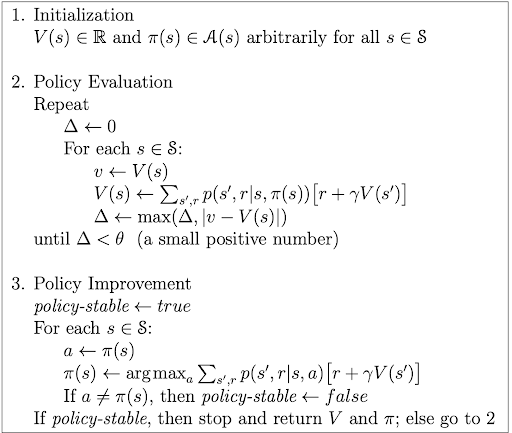

## Policy Evaluation Function

In [3]:
def get_expected_value(state,Pi,V):
    '''
    Update the state-value for a single state under policy pi
    '''
    #pi(s)
    action_prob = Pi[tuple(state)]
    
    
    expected_value = 0
    #for each action and its probability
    #calculate the reward and value of next state
    #sum up to get expectation
    for action in range(len(action_prob)):
        prob = action_prob[action]
        env.reset(state.copy())
        next_state, reward, done, info = env.step(action)
        expected_value += prob*(reward + V[tuple(next_state)])
    
    return round(expected_value,1)

In [4]:
def policy_evaluation_single_round(V,Pi,env):
    """
    Update the value of all states under a current policy Pi
    NOT INPLACE
    SINGLE ROUND
    """
    V_new = {}
    for state in env.states:
        if state in env.end_state:
            V_new[tuple(state)] = 0
            continue      
        V_new[tuple(state)] = get_expected_value(state,Pi,V)
        
    return V_new

## Policy Improvement Function

In [5]:
def policy_improvement(V,Pi,env):
    """
    Update the policy given a state-value functions
    when multiple actions result in the same action_value, the p will be divided equally
    """
    
    policy_stable = True
    Pi_new = {}
    
    #for all non-terminal states
    for state in env.states:
        if state in env.end_state:
            continue
        #old action
        action = Pi[tuple(state)]
        
        #find new optimal action under current state-value function
        action_values = []
        
        #take all actions and find the largest value
        for a in range(env.action_space.n):
            env.reset(state.copy())
            next_state, reward, done, info = env.step(a)
            next_state_value = V[tuple(next_state)]
            action_values.append(reward+next_state_value)
        best_actions = np.argwhere(action_values == np.amax(action_values)).flatten()

        
        #update policy
        prob = 1/len(best_actions)
        Pi_new[tuple(state)] = [prob if i in best_actions else 0 for i in range(env.action_space.n)]
        
        if not np.array_equal(action,Pi_new[tuple(state)]):
            policy_stable = False

    return policy_stable, Pi_new

## Initalize a 4\*4 gridworld

In [7]:
size = 4
V = dict.fromkeys([(i,j) for i in range(size) for j in range(size)], 0) # values as 0
Pi = dict.fromkeys([(i,j) for i in range(size) for j in range(size) if i+j != 0 and i+j != 6], [0.25]*4)# inital actions as UP
env = GridWorld(size)
plot_value(V,size)
print('------------------------------')
plot_policy(Pi,size)

0	|0	|0	|0	|
0	|0	|0	|0	|
0	|0	|0	|0	|
0	|0	|0	|0	|
------------------------------
X	|↑←↓→	|↑←↓→	|↑←↓→	|
↑←↓→	|↑←↓→	|↑←↓→	|↑←↓→	|
↑←↓→	|↑←↓→	|↑←↓→	|↑←↓→	|
↑←↓→	|↑←↓→	|↑←↓→	|X	|
 


In [8]:
for i in range(5):
    
    print('Round#: ',i+1)
    #policy evaluation
    V = policy_evaluation_single_round(V,Pi,env)
    
    #policy improvement
    policy_stable,Pi = policy_improvement(V,Pi,env)
    
    #plot
    
    
    plot_value(V,size)
    print('------------------------------')
    plot_policy(Pi,size)
    print("Policy is stable: ", policy_stable)
    print('=====================================')
    

Round#:  1
0	|-0.8	|-1.0	|-1.0	|
-0.8	|-1.0	|-1.0	|-1.0	|
-1.0	|-1.0	|-1.0	|-0.8	|
-1.0	|-1.0	|-0.8	|0	|
------------------------------
X	|←	|←	|↑←↓→	|
↑	|↑←	|↑←↓→	|↓	|
↑	|↑←↓→	|↓→	|↓	|
↑←↓→	|→	|→	|X	|
 
Policy is stable:  False
Round#:  2
0	|0.0	|-1.8	|-2.0	|
0.0	|-1.8	|-2.0	|-1.8	|
-1.8	|-2.0	|-1.8	|0.0	|
-2.0	|-1.8	|0.0	|0	|
------------------------------
X	|←	|←	|←↓	|
↑	|↑←	|↑←↓→	|↓	|
↑	|↑←↓→	|↓→	|↓	|
↑→	|→	|→	|X	|
 
Policy is stable:  False
Round#:  3
0	|0.0	|-1.0	|-2.8	|
0.0	|-1.0	|-2.8	|-1.0	|
-1.0	|-2.8	|-1.0	|0.0	|
-2.8	|-1.0	|0.0	|0	|
------------------------------
X	|←	|←	|←↓	|
↑	|↑←	|↑←↓→	|↓	|
↑	|↑←↓→	|↓→	|↓	|
↑→	|→	|→	|X	|
 
Policy is stable:  True
Round#:  4
0	|0.0	|-1.0	|-2.0	|
0.0	|-1.0	|-2.0	|-1.0	|
-1.0	|-2.0	|-1.0	|0.0	|
-2.0	|-1.0	|0.0	|0	|
------------------------------
X	|←	|←	|←↓	|
↑	|↑←	|↑←↓→	|↓	|
↑	|↑←↓→	|↓→	|↓	|
↑→	|→	|→	|X	|
 
Policy is stable:  True
Round#:  5
0	|0.0	|-1.0	|-2.0	|
0.0	|-1.0	|-2.0	|-1.0	|
-1.0	|-2.0	|-1.0	|0.0	|
-2.0	|-1.0	|0.0	|0	|
---------